<a href="https://colab.research.google.com/github/FairyAmp/linear-systems-analysis/blob/main/ode_commutator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook explores an algebraic approach to solving linear ordinary differential equations (ODEs) using the language of rings and modules. The goal is to show how concepts from abstract algebra—particularly polynomial rings and modules over rings of differential operators—can be used to formulate and solve ODEs.

This is done by representing differential operators as elements of a noncommutative ring (the Weyl algebra), and solutions to ODEs as elements of modules acted on by these operators.

Note: this assumes the reader has basic familiarity with concepts pertaining to rings and modules. There may be occasional explanations or not. I might go back later and explicitly define what all the algebraic terms means to make this more accessible to a general audience.


A major result from calculus is the **Leibniz Rule (Product Rule)**. For any two functions $f,g: \mathbb{R} \to \mathbb{R}$;

$$
\frac{d}{dx}(fg) = \left(\frac{d}{dx}f \right) g + f \left(\frac{d}{dx}g \right)
$$

## Algebraic Background

To begin talking about this particular result from analysis in an algebraic sense, there needs to be a degree of familiarity with rings and modules.

Let $K[x]$ denote the ring of polynomials in one variable, $x$, over a characteristic zero field $K$. Differentiation in the variable $x$ can be defined by $D: K[x] \to K[x]$. In the language of mathematicians, the map $D$ is a K-linear vector space endomorphism of $K[x]$.

Assume $K$ is always a field of characteristic zero and all ideals are two-sided.

Similarly, define another K-linear endomorphism $X$ by left multiplication by $x$ where $X(f) = xf$.

This gives rise to the expression $(D \circ X)f(x) = D(xf(x))$. By the Leibniz (Product) Rule,

$$
\begin{align*}
D(xf(x)) &= D(x) f(x) + x D(f(x))\\
&= f(x) + (X \circ D) f(x)
\end{align*}
$$

The common factor of $f(x)$ yields the relation $ D X = X D + 1 $ where $1$ is the identity map.

In general, this framework models differential operators such as:

$$
L = a_n(x) \frac{d^n}{dx^n} + \cdots + a_0(x)
$$

as elements of a **differential operator ring**, typically denoted $ R = K[x]\langle D \rangle $, where $ D = \frac{d}{dx} $ and the relation $ D x = x D + 1 $ encodes the Leibniz rule.

The space of solutions to a linear ODE $ L[y] = 0 $ can be viewed as the kernel of the operator $ L $ acting on a module of differentiable functions.

A more thorough explanation is provided below.

# Differential Operator Rings and the Weyl Algebra

The purpose of this notebook is to study ordinary differential equations (ODEs) from an algebraic perspective. Central to this approach is the ring of differential operators with polynomial coefficients.

### What Is This Ring?

Define the ring:

$$
R = K\langle X, D \rangle / \langle DX - XD - 1 \rangle
$$

Breakdown of the notation:
- $K$ represents the base field (e.g., the real numbers $\mathbb{R}$ or complex numbers $\mathbb{C}$) over which the algebra is defined.

- $K⟨X,D⟩$ is the **free associative algebra** over the field $K$ generated by $X$ and $D$. It consists of all finite linear combinations of "words" formed by $X$ and $D$, where multiplication is concatenation (e.g., $Dx^2 Dx$). Since it's a *free algebra*, $X$ and $D$ do not commute.

- $\langle DX - XD - 1 \rangle$ denotes the **two-sided ideal** generated by the element $DX - XD - 1$. An ideal is a subset of the algebra that "absorbs" multiplication from the left and right.

- $R = K\langle X, D \rangle / \langle DX - XD - 1 \rangle$ is the **quotient algebra**, formed by taking the free algebra and imposing the condition that every element in the ideal is equal to zero.

**NOTE:** Setting $DX - XD - 1 = 0$ is equivalent to imposing the relation:

$$ DX - XD = 1 $$

This quotient construction is the standard way to define an algebra by generators and relations, and the resulting algebra $R$ is called the **first Weyl algebra**, which is isomorphic to the algebra of polynomial differential operators with polynomial coefficients in one variable. It is denoted $A_1(K)$, where:

- $K$ is a field (typically $\mathbb{Q}, \mathbb{R}, \mathbb{C}$),

- $X$ represents the multiplication operator by the independent variable $x$ ($X$ acts on a function $f(x)$ by multiplying by $ x $ to yield $x f(x)$ ),

- $D$ is the differentiation operator $\frac{d}{dx}$,

- $1$ is the identity,

- the relation $[D,X] = DX - XD = 1$ reflects the **Leibniz rule** (more commonly known as the ***product rule***) from calculus.

- **Commutator Notation**: The square brackets, $[A,B]$, are the standard notation for the commutator of two operators $A$ and $B$, which is defined as:

$$[A,B] = AB - BA$$

This is **not a commutative ring**, because the operators $ X $ and $ D $ do not commute.

**NOTE:**
* In pure algebra, $X$ and $D$ are just symbols (noncommuting indeterminates) that generate the Weyl algebra.

* In functional analysis or differential equations, people often interpret these symbols as operators acting on a function space.

This defines the Weyl algebra $ A_1(K) $ as the ring generated by two noncommuting symbols $ X $ and $ D $, subject to the relation $ D X - X D = 1 $. These generators satisfy the same algebraic behavior as multiplication and differentiation operators, but in this context, they are abstract algebraic elements of a noncommutative ring.

### The Commutation Relation: $ [D,X] = D X - X D = 1 $

The notation $[D,X] = DX - XD = 1$ is a standard and fundamental commutator relation in mathematics, particularly in the study of operator algebra and differential equations.

In the Weyl algebra $ A_1(K) $, the generators $ X $ and $ D $ do not commute. Instead, they satisfy the relation:

$$
D X - X D = 1
$$

This is called a **commutator relation**, and it's modeled after the behavior of the differentiation and multiplication operators on a function space.

To understand this, let $ f(x) $ be a differentiable function. Then:

- $ D(x f(x)) = f(x) + x f'(x) $,
- $ x D(f(x)) = x f'(x) $,

So their difference is:

$$
(D X - X D)(f(x)) = f(x)
\Rightarrow D X - X D = \text{1}
$$

More specifically,

- The equation $[D,X] = 1$ is the result of applying the operators to a generic function $f(x)$ (which can be thought of as the identity operator applied to the function):
$$
\begin{align*}
[D,x] f(x) &= (DX - XD) f(x) \\
&= D(Xf(x)) - X(Df(x)) \\
&= \frac{d}{dx}( x f(x) ) - x \frac{d}{dx}(f(x)) \\
&= \left(1 \cdot f(x) + x \frac{d}{dx}(f(x))\right) - x \frac{d}{dx}(f(x)) \\
&= f(x) + x f'(x) - x f'(x) \\
&= f(x) = \mathbf{1} \cdot f(x)
\end{align*}
$$

Thus, this behavior is encoded algebraically by imposing the relation:

$$
D X - X D = 1
$$

This relation defines the noncommutative nature of the Weyl algebra and reflects the product rule (Leibniz rule) from calculus in an algebraic setting.

### Why This Matters for ODEs

The first **Weyl** algebra $A_1$ is the algebraic formalisation of linear ordinary differential operators with polynomial coefficients.

Any linear differential operator with polynomial coefficients, like:

$$
L = x^2 \frac{d^2}{dx^2} + 3x \frac{d}{dx} + 2
$$

can be viewed as an element of $ A_1(K) $. Studying such operators algebraically allows people to factor them and understand their kernel (solution space).

Consequently, $A_1$ is the fundamental object for viewing ODEs from an algebraic perspective, in particular through *D-modules*.

To reiterate, $A_1$ over a characteristic zero field (usually $\mathbb{C}$ or $\mathbb{R}$) is defined as a noncommutative field generated by elements $D$ and $X$, which are subjected to the commutation relation $DX - XD = 1$ that is equivalent to the Leibniz/product rule for differentiation. When the operators $D$ and $X$ act on a polynomial $f(x)$, the commutator relation will show the relation between any polynomial and its derivative.

All elements of the ring $A_1$ is a polynomial in $D$ and $X$ of the form:

$$P = f_n(x) D^n + f_{n-1}(x) D^{n-1} + \dots + f_0(x)$$

where each $f_i(x)$ is a polynomial in $X$. As one can observe, this is the form of a linear ODE operator with polynomial coefficients.

Note: The Weyl algebras are intimately connected to quantum mechanics. The first Weyl algebra $A_1$ is a quotient of the universal eveloping algebra of the three-dimensional Heisenberg Lie algebra $\mathfrak{h}_3$.


The cells below will define and manipulate differential operators algebraically using Python.

In [ ]:
!apt-get install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libilmbase25
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libopenexr25
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-uka

In [2]:
# Core libraries
import sympy as sp
from sympy.abc import x
sp.init_printing()

# Optional plotting / numeric
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, Image

# Demo of the Relation: $DX - XD = 1$

Steps:

- Define a symbolic function $f(x)$
- Apply $DX$ and $XD$ to it
- Show the difference is exactly $f(x)$
- Animate how $D(Xf)$ and $X D(f)$ differ visually

The example function to test will be $f(x) = e^{-x^2}$. This is a form of the **Gaussian** function, better known as a normal distribution in probability. It is significant in quantum mechanics, as it is the exact **analytic** solution for the **ground state** of the one-dimensional **Harmonic Oscillator**.

Observe that $D(x f(x) ) = D (x e^{-x^2}) = -2 x e^{-x^2} + e^{-x^2}$ by the Leibniz rule and $ x D ( f(x) ) = x D(e^{-x^2}) = -2x e^{-x^2}$.

Apply the relation to verify:

$$
\begin{align*}
(Dx - xD) (f(x)) &= D(x f(x) ) - x D ( f(x) )\\
&= (-2 x e^{-x^2} + e^{-x^2}) - (-2x e^{-x^2})\\
&= e^{-x^2}\\
&= f(x)
\end{align*}
$$

Therefore, the relation holds.

In [8]:
# Set up symbolic math
x = sp.Symbol('x')
f = sp.Function('f')

# Example function to test with: f(x) = e^{-x^2}
f_expr = sp.exp(-x**2)

# Define D(xf(x)) and x * D(f(x))
Dx_f = sp.diff(x * f_expr, x)
xD_f = x * sp.diff(f_expr, x)
commutator = Dx_f - xD_f

# Simplify to check result
print("D(xf(x)):", Dx_f)
print("x D(f(x)):", xD_f)
print("D x - x D applied to f(x):", commutator)
print("Should be equal to f(x):", f_expr)

D(xf(x)): -2*x**2*exp(-x**2) + exp(-x**2)
x D(f(x)): -2*x**2*exp(-x**2)
D x - x D applied to f(x): exp(-x**2)
Should be equal to f(x): exp(-x**2)


In [9]:
# Check Identity
Dx_f - xD_f == f_expr  # should print True

True

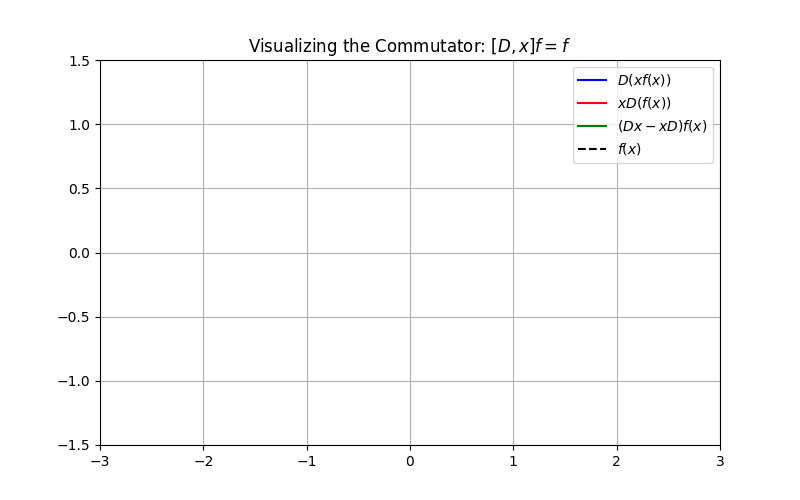

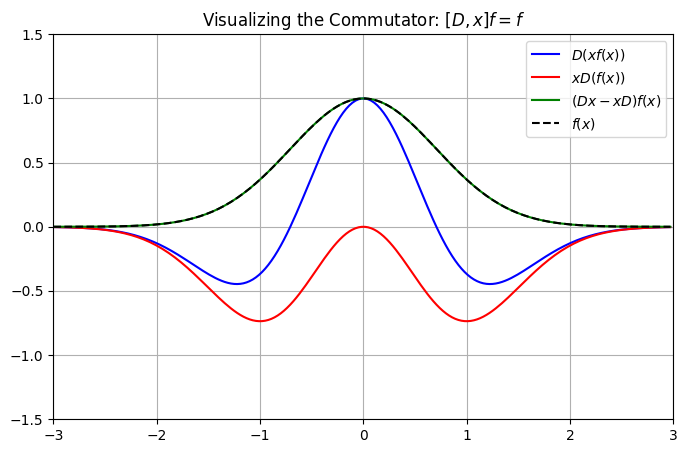

In [10]:
# Animation plots

# Numerical version for animation
fx = lambda x: np.exp(-x**2)
d_fx = lambda x: -2 * x * np.exp(-x**2)
Dx_fx = lambda x: fx(x) + x * d_fx(x)
xD_fx = lambda x: x * d_fx(x)
comm = lambda x: Dx_fx(x) - xD_fx(x)  # Should match fx(x)

# Plot settings
x_vals = np.linspace(-3, 3, 200)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Visualizing the Commutator: $[D, x]f = f$")
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-3, 3)
ax.grid(True)

line1, = ax.plot([], [], label=r"$D(xf(x))$", color='blue')
line2, = ax.plot([], [], label=r"$xD(f(x))$", color='red')
line3, = ax.plot([], [], label=r"$(D x - x D) f(x)$", color='green')
line4, = ax.plot([], [], label=r"$f(x)$", color='black', linestyle='dashed')

ax.legend()

def animate(i):
    t = x_vals[:i]
    line1.set_data(t, Dx_fx(t))
    line2.set_data(t, xD_fx(t))
    line3.set_data(t, comm(t))
    line4.set_data(t, fx(t))
    return line1, line2, line3, line4

ani = FuncAnimation(fig, animate, frames=len(x_vals), interval=30, blit=True)

HTML(ani.to_jshtml())

# Save as GIF
gif_path = "/content/commutator_animation.gif"
ani.save(gif_path, writer=PillowWriter(fps=30))

# Display saved GIF (for confirmation)
Image(filename=gif_path)

#Generalizations and More Complicated Cases

There certainly exists higher order Weyl algebras $A_n$, which are related to the polynomial ring in n variables.

$[D,X]=DX-XD=1$ is the most basic example of a nontrivial commutator relation, which is the defining relation of the **first Weyl algebra**, $A_1(K)$.

- It corresponds to the **Leibniz (product) rule**
- It's the algebraic foundation for differential operators with polynomial coefficients
- It's the base case for generalizations to:

  * Higher-order operators

  * Systems in multiple variables

  * Quantum mechanics and phase space (Heisenberg algebra)

In [11]:
# General Commutator Calculator

def commutator(D_power, x_power):
    # Returns symbolic expression for [D^n, x^m]
    n, m = D_power, x_power
    x, D = sp.symbols('x D', commutative=False)
    result = 0
    for k in range(1, min(n, m) + 1):
        coeff = sp.binomial(n, k) * sp.binomial(m, k) * sp.factorial(k)
        term = coeff * x**(m - k) * D**(n - k)
        result += term
    return result

In [ ]:
commutator(3, 2)

Expect output $[D^3,x^2] = 6xD^2 + 6D$ for commutator(3, 2).

Calculate $D^3(x^2 f)$:
$$
\begin{align*}
D(x^2 f) &= x^2 Df + 2x f\\
D^2(x^2 f) &= 2 f + 2x Df + 2x Df + x^2 D^2 f\\
&= x^2 D^2 f + 4x Df + 2f\\
D^3(x^2 f) &= 0 f + 2 Df + 4 D f + 4x D^2 f + 2x D^2f + x^2 D^3 f\\
&= x^2 D^3 + 6x D^2 f + 6 Df
\end{align*}
$$

So, $D^3(x^2 f) = x^2 D^3 f + 6x D^2 f + 6 Df$.

Subtract by $x^2 D^3 f$:

$$
\begin{align*}
D^3(x^2 f) - x^2 D^3(f) &= (x^2 D^3 f + 6x D^2 f + 6 Df)
- (x^2 D^3 f)\\
&= 6x D^2 f + 6 Df
\end{align*}
$$

# Solutions to ODE

Given some ODE, the first Weyl Algebra $A_1$ rephrases an analytic problem into an algebraic one. However, to actually find a solution, one needs to study the module structure over $A_1$.

## Rephrase the ODE with $A_1$

Consider a first order linear ODE of the form:
$$
L(x, D) u = f(x)
$$

where $L(x,D) = a_1(x) D + a_0(x)$ and $u(x)$ is some unknown function that solves the ODE.

### Weyl Algebra $A_1$

Recall $A_1$ is defined as the set of noncommutative polynomials in the variables $x$ and $D =\frac{d}{dx}$, subjected to the commutation relation:
$$[D,X] = DX - XD = 1$$

Note: any linear operator $L$ with polynomial coefficients are elements of $A_1$.

### Formulate D-Module

Rephrase the ODE by defining a left $A_1$-module $M$ to algebraically capture the ODE:
- The linear operator $L$ generates a left ideal $A_1 L$ in $A_1$.
- The $A_1$-module associated with the homogeneous equation $Lu = 0$ is the quotient module:
$$ M = A_1 / I = A_1 / A_1 L $$

In analysis, when one says "$u$ is a solution to $Lu = 0$," this is equivalent to saying "$u$ is an $A_1$-module homomorphism from $M$ to the function space $\mathcal{F}$."

$$\text{Ker}(L: \mathcal{F} \to \mathcal{F}) \cong \text{Hom}_{A_1}(M, \mathcal{F})$$

- $\text{Ker}(L: \mathcal{F} \to \mathcal{F})$ explicitly defines the solution set as the kernel of the linear transformation $L$ that acts on the function space $\mathcal{F}$. This is standard notation in functional analysis for the solution set of a linear homogeneous equation.
- $\text{Hom}_{A_1}(M, \mathcal{F})$ is standard notation to denote the set of homomorphisms from $M$ to $\mathcal{F}$ over the ring $A_1$, and $M$ and $\mathcal{F}$ are modules over $A_1$.

The module $M$ is generated by a single element, the coset of $1$, which is denoted by $\mathbf{[1]}$ that represents the fundamental unknown solution to the ODE.

The element $[1]$ is the coset $1 + I$.

Any element $L \cdot [1]$ in $M$ is obtained by applying an operator $L \in A_1$ to the generator $[1]$.

$$M = A_1 \cdot [1] = \{ L \cdot [1] \mid L \in A_1 \}$$

Considering the solution functor $\text{Hom}_{A_1}(M, \mathcal{F})$, the element $[1] \in M$ corresponds exactly to the function $\mathbf{u}$ that solves the equation:

$$\text{Hom}_{A_1}(M, \mathcal{F}) \ni \phi \quad \text{such that } \quad \phi([1]) = u \in \mathcal{F}$$

Since the equation $L u = 0$ means $L \cdot [1] = 0$ in the module $M$, the generator $[1]$ algebraically encodes the entire equation.

The module $M$ captures the structure of the differential equation $L u = 0$.

The solution space $\text{Hom}_{A_1}(M, \mathcal{F})$ is the space of all functions $u$ that satisfy the equation.

##Example

Consider the ODE $u' - x u = 0$.

The operator is $L = D - X \in A_1$.
The module is $M = A_1 / A_1 (D -X)$.

Look for annihilators.

To find the solutions $u \in \mathcal{F}$, one needs to find all functions $u$ that satisfy $L u = 0$. For a first order linear, look for elements of $A_1$ that 'annihilate" the generators of $M$.

Since $L$ is a scalar operator, the simplest way to solve algebraically is to find a factor or simple form for $L$.

To solve this analytically, observe that the equation $u' - x u = 0$ is a separable equation. Consequently, it can be rewritten as:

$$\frac{du}{dx} = xu$$

Applying separation of variables,

$$
\begin{align*}
\int \frac{1}{u} \, du &= \int x \, dx \\
\ln |u| &= \frac{1}{2} x^2 + C \\
u(x) &= u_0 \, e^{\frac{x^2}{2}}
\end{align*}
$$


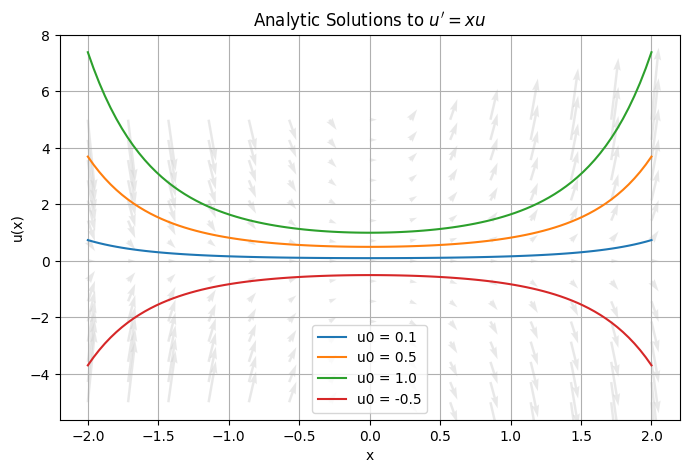

In [3]:
# 1. Define the analytical solution
def analytical_sol(x, u0):
    return u0 * np.exp(x**2 / 2)

x = np.linspace(-2, 2, 100)
u0_values = [0.1, 0.5, 1.0, -0.5]

plt.figure(figsize=(8, 5))

# 2. Plot trajectories
for u0 in u0_values:
    plt.plot(x, analytical_sol(x, u0), label=f'u0 = {u0}')

# 3. Add the "Direction Field" (The D-module flow)
X_grid, U_grid = np.meshgrid(np.linspace(-2, 2, 15), np.linspace(-5, 5, 15))
# Since du/dx = xu:
V = X_grid * U_grid  # Change in u
W = np.ones_like(V)  # Change in x is constant
plt.quiver(X_grid, U_grid, W, V, color='lightgray', alpha=0.5)

plt.title("Analytic Solutions to $u' = xu$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

Algebraic apporach: check if this function belongs to the kernel of the operator ($D - x$).

In [4]:
# algebraic operator D - x
x = sp.Symbol('x')

# Define the operator D - x
def P(u):
    # u is a sympy expression
    return sp.diff(u, x) - x*u

# Example 1: Applying it to a polynomial
poly = x**3
print(f"P(x^3) = {P(poly)}")  # Returns 3x^2 - x^4

# Example 2: Verifying the solution u = e^(x^2/2)
sol = sp.exp(x**2 / 2)
print(f"P(sol) = {sp.simplify(P(sol))}")  # Returns 0

P(x^3) = -x**4 + 3*x**2
P(sol) = 0


Typically, the operator $D-x$ has infinite dimension. However, restricting to polynomials of degree 3, the operator $D - x$ can be represented by matrices. Here $D$ and $X$ will be represented seperately, each with their own matrix.

Pick the basis to be $\{1, x, x^2, x^3\}$ for degree 3 polynomials.

In [16]:
# basis of {1, x, x^2, x^3}
# D (Differentiation) Matrix
D = np.array([
    [0, 1, 0, 0],
    [0, 0, 2, 0],
    [0, 0, 0, 3],
    [0, 0, 0, 0]
])

# X (Multiplication by x) Matrix
X = np.array([
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
])

# The Operator Matrix P = D - X
P_matrix = D - X

print("Matrix representation of D - x on basis {1, x, x^2, x^3}:")
print('P =', P_matrix)

Matrix representation of D - x on basis {1, x, x^2, x^3}:
P = [[ 0  1  0  0]
 [-1  0  2  0]
 [ 0 -1  0  3]
 [ 0  0 -1  0]]


In [6]:
# Calculate [D, X]
commutator = D @ X - X @ D
print("\nCommutator [D, X]:")
print(commutator) # Should look like the Identity matrix


Commutator [D, X]:
[[ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -3]]


# Relation to linear systems

Representing linear differential operators as matrices is a way of trying to turn an infinite dimensional operator problem into a finite dimensional linear algebra problem.

The operator $D -x$ acts like a system matrix $A$ in linear ODEs:
$$ \mathbf{\dot{x}} = A \mathbf{x}$$

The linear differential operator $P = D - x$ is represented as a matrix on the finite basis $\{1, x, x^2, x^3 \}$. This allows for the ODE $(D - x)u = 0$ to be expressed as a matrix equation $P \mathbf{u} = 0$ where $\mathbf{u}$ is the vector of coefficients of $u$ in the finite basis.